In [1]:
from tensorflow.keras.models import Model
import scipy as sp
import importlib
import tensorflow

#### Load data

In [2]:
from tensorflow.keras.datasets import mnist
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()
print(X_train.shape)
print(type(X_train))

(60000, 28, 28)
<class 'numpy.ndarray'>


#### Preprocess Data

In [3]:
X_train = X_train.reshape((X_train.shape[0],
                           X_train.shape[1],
                           X_train.shape[2],
                           1)
                         )
X_test = X_test.reshape((X_test.shape[0],
                         X_test.shape[1],
                         X_test.shape[2],
                         1)
                       )

# Normalize
X_train = X_train/255
X_test  = X_test/255

# Change dtype
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

Y_train = Y_train.astype('float32')
Y_test  = Y_test.astype('float32')

# print shape
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


#### Make Model

In [4]:
import tensorflow
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import Model, Sequential
from tensorflow.keras import regularizers, optimizers
import numpy as np

#### Model Architechture

In [5]:
np.random.seed(0)
model = Sequential()
model.add(Conv2D(16,input_shape=(28,28,1),kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(10,activation='softmax'))

model.summary()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(X_train,Y_train,batch_size=32,epochs=5,validation_split=0.1,shuffle=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         7

#### Train Model

In [6]:
model.evaluate(X_test, Y_test)

[0.03972118439119077, 0.9869]

In [7]:
# Global Average pooling weights
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

(128, 10)

In [8]:
cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))

In [9]:
features, results = cam_model.predict(X_test)
features.shape

(10000, 3, 3, 128)

In [10]:
import matplotlib.pyplot as plt

9.333333333333334 9.333333333333334
(28, 28, 128)
(3, 3, 128)


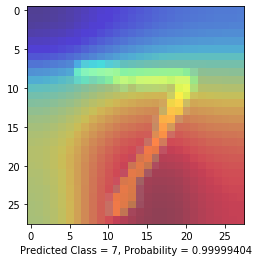

9.333333333333334 9.333333333333334
(28, 28, 128)
(3, 3, 128)


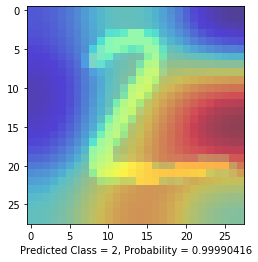

9.333333333333334 9.333333333333334
(28, 28, 128)
(3, 3, 128)


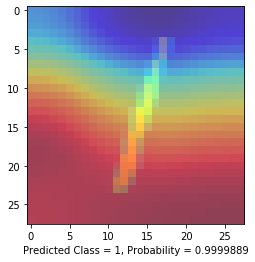

9.333333333333334 9.333333333333334
(28, 28, 128)
(3, 3, 128)


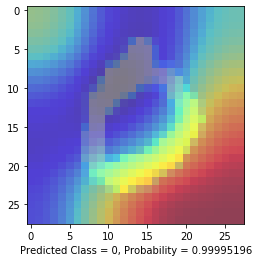

9.333333333333334 9.333333333333334
(28, 28, 128)
(3, 3, 128)


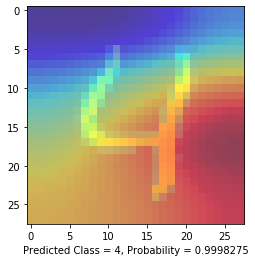

9.333333333333334 9.333333333333334
(28, 28, 128)
(3, 3, 128)


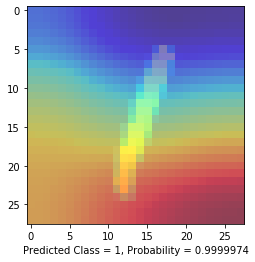

9.333333333333334 9.333333333333334
(28, 28, 128)
(3, 3, 128)


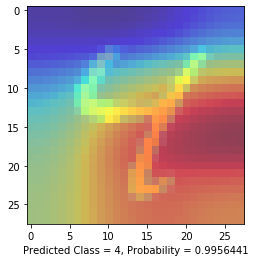

9.333333333333334 9.333333333333334
(28, 28, 128)
(3, 3, 128)


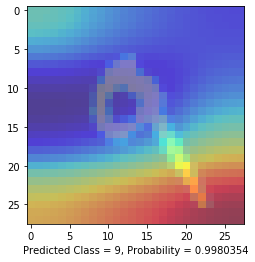

9.333333333333334 9.333333333333334
(28, 28, 128)
(3, 3, 128)


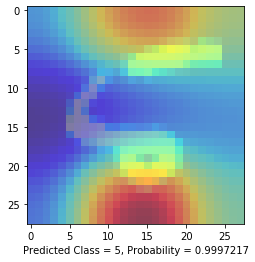

9.333333333333334 9.333333333333334
(28, 28, 128)
(3, 3, 128)


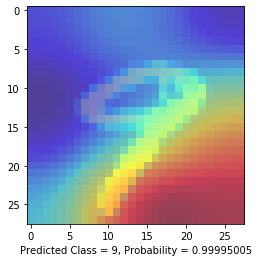

In [11]:
for idx in range(10):
    features_for_one_img = features[idx,:,:,:]
    height_roomout = X_train.shape[1]/features_for_one_img.shape[0]
    width_roomout  = X_train.shape[2]/features_for_one_img.shape[1]
    print(height_roomout,width_roomout)
 
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    print(cam_features.shape)
    pred = np.argmax(results[idx])
    
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,pred]
    cam_output  = np.dot(cam_features,cam_weights)
    print(features_for_one_img.shape)

    buf = 'Predicted Class = ' +str( pred )+ ', Probability = ' + str(results[idx][pred])

    plt.xlabel(buf)

    plt.imshow(np.squeeze(X_test[idx],-1), alpha=0.5)
    plt.imshow(cam_output, cmap='jet', alpha=0.5)
    plt.show()